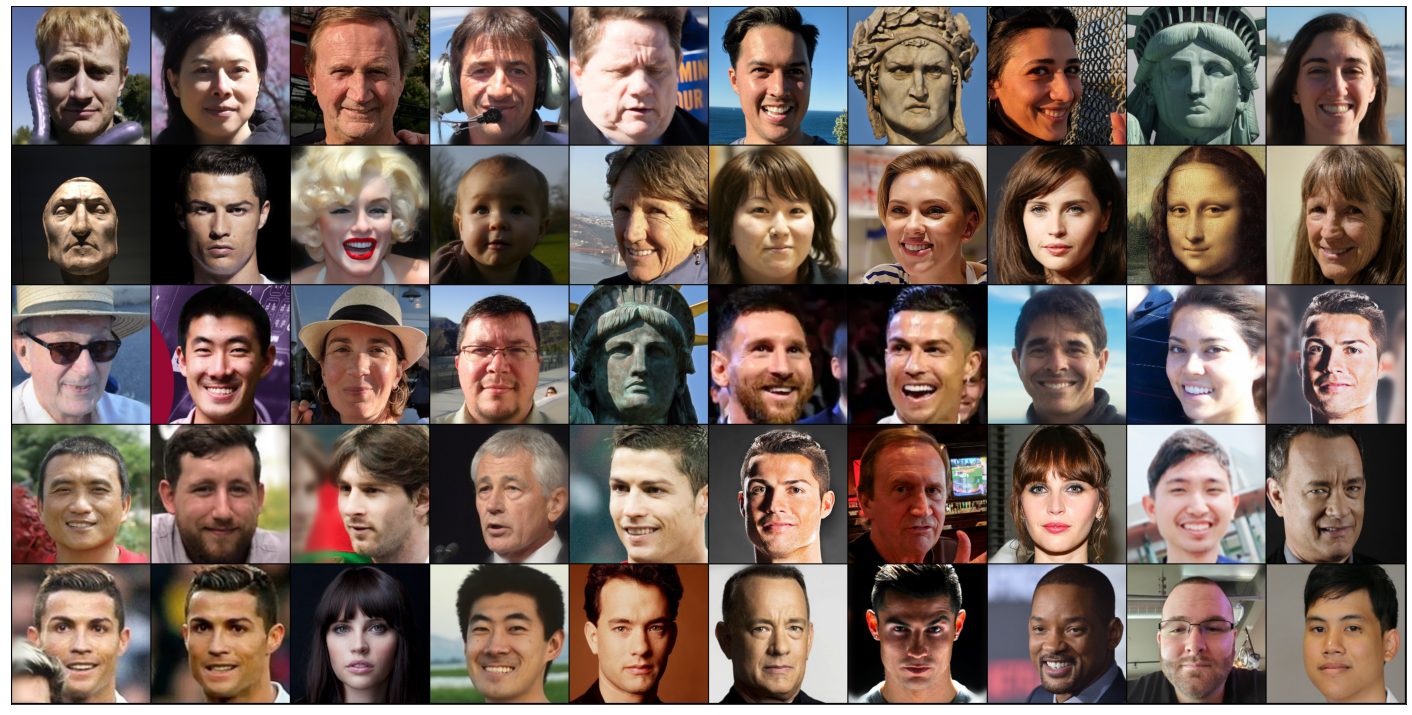

In [9]:
import numpy as np
import pandas as pd
import torchvision
import torch as th
import PIL
import blobfile as bf
import matplotlib.pyplot as plt
import torchvision.transforms.functional as F
import json


plt.rcParams["savefig.bbox"] = 'tight'


def show(imgs):
    if not isinstance(imgs, list):
        imgs = [imgs]
    fig, axs = plt.subplots(ncols=len(imgs), squeeze=False, figsize=(25,25))
    for i, img in enumerate(imgs):
        img = img.detach()
        img = F.to_pil_image(img)
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

def load_image(path):
    with bf.BlobFile(path, "rb") as f:
        pil_image = PIL.Image.open(f)
        pil_image.load()
    pil_image = pil_image.convert("RGB")
    return np.array(pil_image)

# shadow_f = '/data/mint/DPM_Dataset/ffhq_256_with_anno/params/valid/ffhq-valid-shadow-anno.txt'
shadow_f = '/data/mint/DPM_Dataset/ITW/params/valid/ffhq-valid-shadow-anno.txt'
image_dir = '/data/mint/DPM_Dataset/ITW/itw_images_aligned/valid/'
shadow = pd.read_csv(shadow_f, sep=' ', names=['img', 'shadow_score'])
shadow = shadow.sort_values(by=['shadow_score'], ascending=False)

images = []
for i in range(50):
    tmp = load_image(image_dir + shadow.iloc[i]['img'])
    tmp = th.tensor(tmp).permute(2, 0, 1) / 255.0
    images.append(tmp)
images = th.stack(images, dim=0)
show(torchvision.utils.make_grid(images, nrow=10))



In [10]:
n = int(len(shadow) * 1)
data = {'list':shadow.iloc[0:n]['img'].tolist()
}
with open('all_famous_ppl.json', 'w') as outfile:
    json.dump(data, outfile, indent=4)

In [37]:
shadow.iloc[0:n]['shadow_score']
shadow.iloc[0:n]['img']

9380    69380.jpg
8578    68578.jpg
9867    69867.jpg
6921    66921.jpg
7967    67967.jpg
          ...    
5357    65357.jpg
3226    63226.jpg
7410    67410.jpg
5226    65226.jpg
9011    69011.jpg
Name: img, Length: 2500, dtype: object